In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import unidecode
import warnings
warnings.filterwarnings('ignore')
import time
import scorecardpy as sc


from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score



In [2]:
df = pd.read_csv('train.csv')
print(df.shape)

(30000, 64)


In [88]:
df.head()

,id,label,province,district,age_source1,age_source2,maCv,FIELD_1,FIELD_2,FIELD_3,...,FIELD_48,FIELD_49,FIELD_50,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57
0,0,0,NaN,NaN,NaN,NaN,NaN,1,1.0,2547.0,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,Tỉnh Đồng Nai,Thành phố Biên Hòa,44.0,44.0,None,1,0.0,-1.0,...,False,True,29.77,17.561,30.955,31.171,0.0,0.04,0.0,0.0
2,2,0,Tỉnh Đồng Nai,Huyện Long Thành,30.0,30.0,Công nhân,0,1.0,3273.0,...,True,True,29.77,56.512,30.955,31.171,0.0,0.16,0.0,0.0
3,3,0,Tỉnh Tuyên Quang,Thành phố Tuyên Quang,43.0,NaN,NaN,0,1.0,3991.0,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,Thành phố Hồ Chí Minh,Quận 1,21.0,21.0,None,0,1.0,1450.0,...,True,True,29.77,13.789,30.955,31.171,0.0,0.03,0.0,0.0


In [89]:
def VI_to_EN_province(string):
    try:
        string = unidecode.unidecode(string)
        string = string.replace(" ", "").replace("-", "").upper()
        if string == 'TINHDACNONG':
            string = 'TINHDAKNONG'
        elif string == 'THANHPHOHOCHIMINH':
            string = 'TPHOCHIMINH'
        return string
    except:
        return 'NULL'
    
df['province'] = [np.nan if x== None else VI_to_EN_province(x) for x in df['province']]

group4 = ['TINHBINHDUONG','TPHOCHIMINH','TINHLONGAN','TINHDONGNAI',
              'TINHBACNINH','THANHPHOHANOI']
group3 = ['TINHBARIAVUNGTAU','THANHPHOHAIPHONG','TINHTIENGIANG','TINHCAMAU',
          'TINHBINHPHUOC','TINHBACLIEU','TINHBACGIANG','TINHTUYENQUANG',
          'TINHCAOBANG']
group2 = ['TINHKIENGIANG','THANHPHOCANTHO','TINHLAOCAI','TINHTAYNINH',
          'TINHLANGSON','TINHTHAIBINH','TINHANGIANG','TINHSOCTRANG',
          'TINHBENTRE','TINHHANAM','THANHPHODANANG','TINHDONGTHAP',
          'TINHVINHLONG','TINHDAKNONG','TINHLAMDONG','TINHTHANHHOA',
          'TINHNGHEAN','TINHTHAINGUYEN','TINHHAUGIANG','TINHGIALAI']
group1 = ['TINHLAICHAU','TINHVINHPHUC','TINHBINHTHUAN','TINHQUANGNINH',
          'TINHHAGIANG','TINHYENBAI','TINHKHANHHOA','TINHPHUTHO',
          'TINHHOABINH','TINHPHUYEN','TINHHUNGYEN','TINHSONLA',
          'TINHNAMDINH','TINHTRAVINH','TINHHAIDUONG','TINHDIENBIEN',
          'TINHQUANGNGAI','TINHKONTUM','TINHDAKLAK','TINHHATINH',
          'TINHBINHDINH','TINHQUANGNAM','TINHNINHTHUAN','TINHBACKAN',
          'TINHQUANGBINH','TINHNINHBINH','TINHTHUATHIENHUE','TINHQUANGTRI']


df.loc[df.province.isin(group1 ), 'province'] = 'group1'
df.loc[df.province.isin(group2 ), 'province'] = 'group2'
df.loc[df.province.isin(group3 ), 'province'] = 'group3'
df.loc[df.province.isin(group4 ), 'province'] = 'group4'


In [90]:
df.drop(['id','district'], axis=1, inplace=True)

In [93]:
df.maCv.unique()

array(['none', 'congnhan', 'other', 'nhanvien', 'giaovien', 'ketoan',
       'taixe'], dtype=object)

In [92]:
def VI_to_EN2(string):
    try:
        string = unidecode.unidecode(string)
        string = string.replace(" ", "").replace("-", "").lower()
    except:
        return  'none'
    
    value_list = ['congnhan','nhanvien','giaovien' ,'ketoan']
    
    if string == 'none':
        return string
    elif string in ('taixe','laixe'):
        return 'taixe'
    
    for s in value_list:
        if s in string:
            return  s
            
            
    return 'other'

df['maCv'] = [np.nan if x== None else VI_to_EN2(x) for x in df['maCv']]


In [94]:
bool_cols = list(df.dtypes[df.dtypes == 'bool'].index)
# Change 
for col in bool_cols:
    df[col] = df[col].map({True:1 , False:0})

In [95]:
object_cols = list(df.dtypes[df.dtypes == 'object'].index)

In [96]:
float_cols = list(df._get_numeric_data().columns)

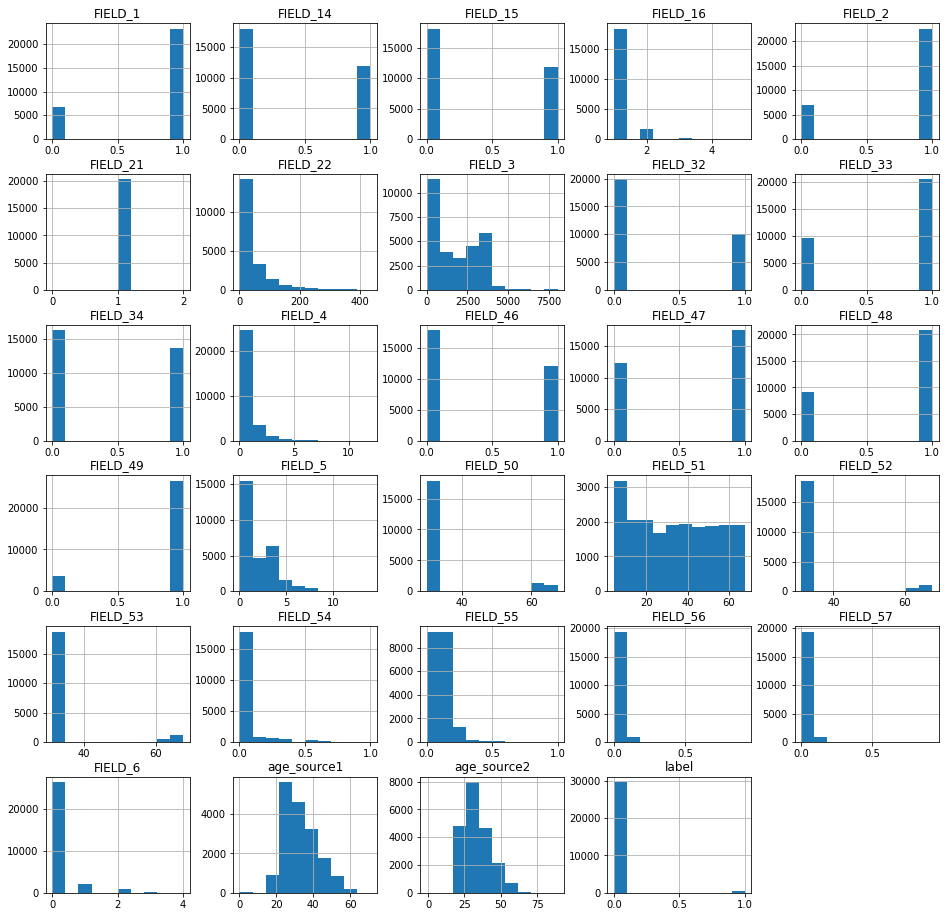

In [16]:
df[float_cols].hist(figsize=(16,16))
plt.show()

### df.FIELD_7

In [97]:
df.FIELD_18.isnull().sum()

9678

In [100]:
df.head()

,label,province,age_source1,age_source2,maCv,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,...,FIELD_48,FIELD_49,FIELD_50,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57
0,0,NULL,NaN,NaN,none,1,1.0,2547.0,0.0,0.0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,group4,44.0,44.0,none,1,0.0,-1.0,1.0,1.0,...,0,1,29.77,17.561,30.955,31.171,0.0,0.04,0.0,0.0
2,0,group4,30.0,30.0,congnhan,0,1.0,3273.0,1.0,4.0,...,1,1,29.77,56.512,30.955,31.171,0.0,0.16,0.0,0.0
3,0,group3,43.0,NaN,none,0,1.0,3991.0,1.0,1.0,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,group4,21.0,21.0,none,0,1.0,1450.0,0.0,2.0,...,1,1,29.77,13.789,30.955,31.171,0.0,0.03,0.0,0.0


In [18]:
from scipy import stats

x1 = ['TC','NO','CC','NN','TK','HX','TQ','XK','HD','HC','CH','SV','GB','XD']
x2 = ['DN', 'GD', 'DT', 'CK', 'TE']
x3 = ['CB', 'DK', 'HS', 'CN']
x4 = ['BT', '', 'TN', 'TA', 'HT', 'none', 'HN', 'TS', 'KC']

def field7(x):
    try:
        x = x.replace("[","").replace("]","").replace("'","")
        x = x.split(',')
        return stats.mode(x).mode[0].replace(" ","")
    except:
        return 'none'
    
df.FIELD_7 = [field7(x) for x in df.FIELD_7]

df.loc[df.FIELD_7.isin(x1 ), 'FIELD_7'] = 'group1'
df.loc[df.FIELD_7.isin(x2 ), 'FIELD_7'] = 'group2'
df.loc[df.FIELD_7.isin(x3 ), 'FIELD_7'] = 'group3'
df.loc[df.FIELD_7.isin(x4 ), 'FIELD_7'] = 'group4'

In [ ]:
import scorecardpy as sc

dt_s = df[['FIELD_18','label']].copy()
y_label = 'label'
# breaking dt into train and test
train, test = sc.split_df(dt_s, y_label).values()

# woe binning ------
#bins = sc.woebin(dt_s, y=y_label,method = "tree")
bins = sc.woebin(dt_s, y=y_label)
sc.woebin_plot(bins)
bins 

In [19]:
#df.FIELD_13.unique()

### FIELD_13 

In [20]:
# FIELD_13 
#df.FIELD_18.value_counts()[df.FIELD_18.value_counts() > 150]

In [21]:
import scorecardpy as sc

dt_s.drop(['FIELD_13','FIELD_18','FIELD_19','FIELD_23',
           'FIELD_20','FIELD_25','FIELD_26','FIELD_27',
           'FIELD_28','FIELD_37','FIELD_38','FIELD_45'], axis = 1 ,inplace = True) 
y_label = 'label'

# breaking dt into train and test
train, test = sc.split_df(dt_s, y_label).values()

# woe binning ------
#bins = sc.woebin(dt_s, y=y_label,method = "tree")
breaks_adj = {}
# -- pecify breaks manually
for col in dt_s.columns.difference(['label']):
    if len(dt_s[col].unique()) == 2:        
        breaks_adj[col] = sorted(dt_s[col].unique())


bins = sc.woebin(dt_s, y=y_label,breaks_list=breaks_adj)
#---------------

# sc.woebin_plot(bins)
# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins)  
test_woe = sc.woebin_ply(test, bins)

y_train = train_woe.loc[:,y_label]
X_train = train_woe.loc[:,train_woe.columns != y_label]
y_test = test_woe.loc[:,y_label]
X_test = test_woe.loc[:,train_woe.columns != y_label]



[INFO] creating woe binning ...
Binning on 30000 rows and 50 columns in 00:00:16
[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [22]:
#sc.woebin_plot(bins)

error = []
for col in df.columns:
    dt_s = df[[col,'label']].copy()
    if col not in ['province', 'maCv', 'FIELD_7', 'FIELD_13','label']:
        try:
        #dt_s.drop(['province', 'maCv', 'FIELD_7', 'FIELD_13'], axis = 1 ,inplace = True) 
            y_label = 'label'
            train, test = sc.split_df(dt_s, y_label).values()
            bins = sc.woebin(dt_s, y=y_label)
        except:
            error.append(col)
            print(col)

In [80]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

def model_selections(X_train,X_test,y_train,y_test):
    log = LogisticRegression(n_jobs=-1)
    rf = RandomForestClassifier(max_depth=14, random_state=0,n_jobs=-1)
    gnb = GaussianNB()
    knn = KNeighborsClassifier(n_neighbors=19,n_jobs=-1)
    
    #sVm = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True),n_jobs=-1)
    bagging_rf = BaggingClassifier(rf,n_estimators=10,
                                 max_samples=0.5, max_features=0.8)
    
    bagging_log = BaggingClassifier(log,n_estimators=10,
                                 max_samples=0.5, max_features=0.8)
    
    AdaBoost = AdaBoostClassifier(n_estimators=10)
    
    GradientBoosting = GradientBoostingClassifier(n_estimators=10,
                                                  learning_rate=0.001,
                                                  max_depth=3, random_state=0)
    
    eclf = VotingClassifier(
        estimators=[ ('rf', rf), ('knn', knn)],
        voting='soft')
    
    model_dicts = {
        'logistic' : log,
        'rf' : rf,
        #'svm': sVm,
        'gnb':gnb,
        'knn': knn,
        'bagging_rf': bagging_rf,
        'bagging_log' :bagging_log ,
        'AdaBoost':AdaBoost,
        "GradientBoosting":GradientBoosting,
        'eclf':eclf
    }
    
    results = []
    for clf in model_dicts:
        start_time = time.time()
        try:
            model_dicts[clf].fit(X_train, y_train)

            y_pred = model_dicts[clf].predict(X_test)

            acc = accuracy_score(y_test, y_pred )
            recall = recall_score(y_test, y_pred )
            precision = precision_score(y_test, y_pred )
            f1 = f1_score(y_test, y_pred )

            probs = model_dicts[clf].predict_proba(X_test)
            probs = probs[:, 1]

            auc = roc_auc_score(y_test,probs)
            gini = 2*auc - 1

            temp = [clf,acc,recall,precision,f1,gini]

            results.append(temp)
            print("%s minutes - completed : " % round((time.time() - start_time)/60, 2), clf)
        except Exception as e:
            print(e)
            pass
        
    result_df = pd.DataFrame(results, columns=['model', 'acc','recall','precision','f1','gini'])
    result_df.sort_values(by='gini', ascending=False,inplace=True)
    result_df.reset_index(drop=True,inplace=True)
    print(result_df)
    return result_df


In [83]:

def model_selections_gini(X_train,X_test,y_train,y_test):
    log = LogisticRegression(n_jobs=-1)
    rf = RandomForestClassifier(max_depth=14, random_state=0,n_jobs=-1)
    gnb = GaussianNB()
    knn = KNeighborsClassifier(n_neighbors=19,n_jobs=-1)
    
    #sVm = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True),n_jobs=-1)
    bagging_rf = BaggingClassifier(rf,n_estimators=10,
                                 max_samples=0.5, max_features=0.8)
    
    bagging_log = BaggingClassifier(log,n_estimators=10,
                                 max_samples=0.5, max_features=0.8)
    
    AdaBoost = AdaBoostClassifier(n_estimators=10)
    
    GradientBoosting = GradientBoostingClassifier(n_estimators=10,
                                                  learning_rate=0.001,
                                                  max_depth=3, random_state=0)
    
    eclf = VotingClassifier(
        estimators=[ ('rf', rf), ('knn', knn)],
        voting='soft')
    
    model_dicts = {
        'logistic' : log,
        'rf' : rf,
        #'svm': sVm,
        'gnb':gnb,
        'knn': knn,
        'bagging_rf': bagging_rf,
        'bagging_log' :bagging_log ,
        'AdaBoost':AdaBoost,
        "GradientBoosting":GradientBoosting,
        'eclf':eclf
    }
    
    results = []
    for clf in model_dicts:
        start_time = time.time()
        try:
            scores_from_cross = cross_val_score(model_dicts[clf], X_train, y_train, cv = 3, scoring="roc_auc", n_jobs = -1)
            print('Total time : ' ,time.time() - start_time)

            # Xem 5 giá trị của auc tương ứng khi : 
            #print('auc : ',scores_from_cross)
            ginis = [x*2-1 for x in scores_from_cross]
            #print('ginis : ',ginis)
            #print('gini trung binh : %.4f' % np.mean(ginis))
            results.append([clf,np.mean(ginis)])
            #print("%s minutes - completed : " % round((time.time() - start_time)/60, 2), clf)
        except Exception as e:
            print(e)
            pass
        
    result_df = pd.DataFrame(results, columns=['model','gini'])
    result_df.sort_values(by='gini', ascending=False,inplace=True)
    result_df.reset_index(drop=True,inplace=True)
    print(result_df)
    return result_df

model_selections_gini(X_train,X_test,y_train,y_test)

Total time :  0.26130127906799316
auc :  [0.6364693  0.6117965  0.63197934]
ginis :  [0.2729385901227588, 0.22359299488198237, 0.2639586797889266]
gini trung binh : 0.2535
0.0 minutes - completed :  logistic
Total time :  0.2659316062927246
auc :  [0.5736851  0.521696   0.59848185]
ginis :  [0.14737020422407832, 0.043392000575664724, 0.196963699593121]
gini trung binh : 0.1292
0.0 minutes - completed :  rf
Total time :  0.17976808547973633
auc :  [0.64122654 0.59332833 0.63134962]
ginis :  [0.28245308348553966, 0.18665666106850032, 0.26269923070793877]
gini trung binh : 0.2439
0.0 minutes - completed :  gnb
Total time :  2.733846426010132
auc :  [0.54132755 0.55073044 0.55160336]
ginis :  [0.0826550913365891, 0.10146087729735775, 0.1032067115784494]
gini trung binh : 0.0958
0.05 minutes - completed :  knn
Total time :  2.359853744506836
auc :  [0.58610362 0.53287006 0.58771356]
ginis :  [0.17220723509077618, 0.06574012086385661, 0.17542712030823093]
gini trung binh : 0.1378
0.04 minute

,model,gini
0,logistic,0.253497
1,gnb,0.243936
2,bagging_log,0.241491
3,AdaBoost,0.213294
4,eclf,0.157575
5,GradientBoosting,0.156558
6,bagging_rf,0.137791
7,rf,0.129242
8,knn,0.095774


In [24]:
df_result1 = model_selections(X_train,X_test,y_train,y_test)

0.0 minutes - completed :  logistic
0.01 minutes - completed :  rf
0.0 minutes - completed :  gnb
0.07 minutes - completed :  knn
0.07 minutes - completed :  bagging_rf
0.02 minutes - completed :  bagging_log
0.0 minutes - completed :  AdaBoost
0.0 minutes - completed :  GradientBoosting
0.06 minutes - completed :  eclf
              model       acc    recall  precision        f1      gini
0          logistic  0.983778  0.000000   0.000000  0.000000  0.239127
1        bagging_rf  0.983778  0.000000   0.000000  0.000000  0.235840
2       bagging_log  0.983778  0.000000   0.000000  0.000000  0.227553
3               gnb  0.670667  0.376712   0.018784  0.035784  0.186185
4          AdaBoost  0.983778  0.000000   0.000000  0.000000  0.182031
5              eclf  0.983778  0.000000   0.000000  0.000000  0.147509
6  GradientBoosting  0.983778  0.000000   0.000000  0.000000  0.116634
7               knn  0.983778  0.000000   0.000000  0.000000  0.114562
8                rf  0.983667  0.000000

AUC: 0.6196
gini: 0.2391
KS: 0.1846


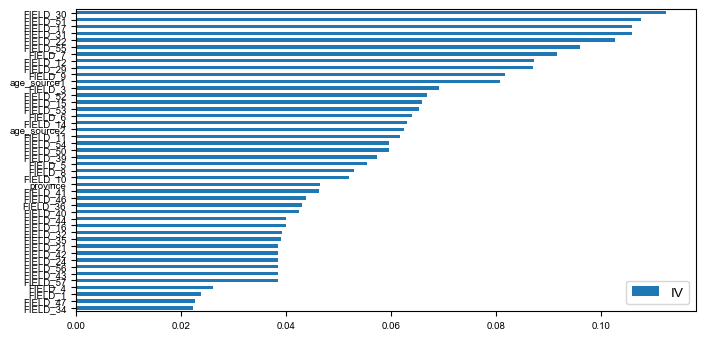

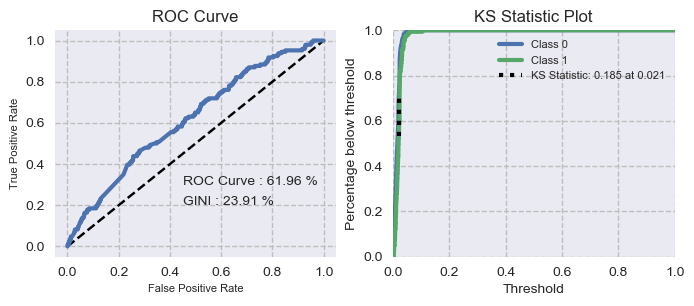

3.0    2152
4.0    2046
1.0    1811
2.0    1797
5.0    1194
Name: bin, dtype: int64


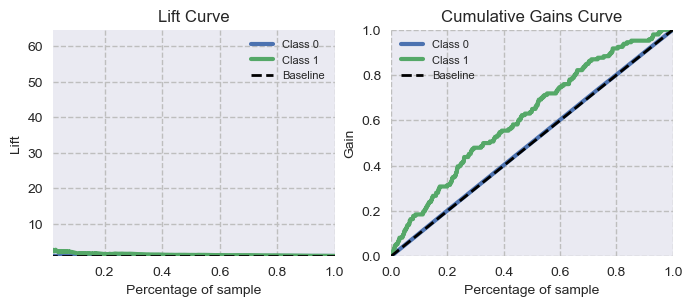

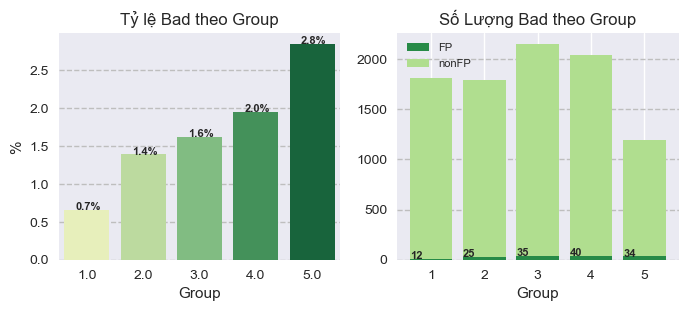

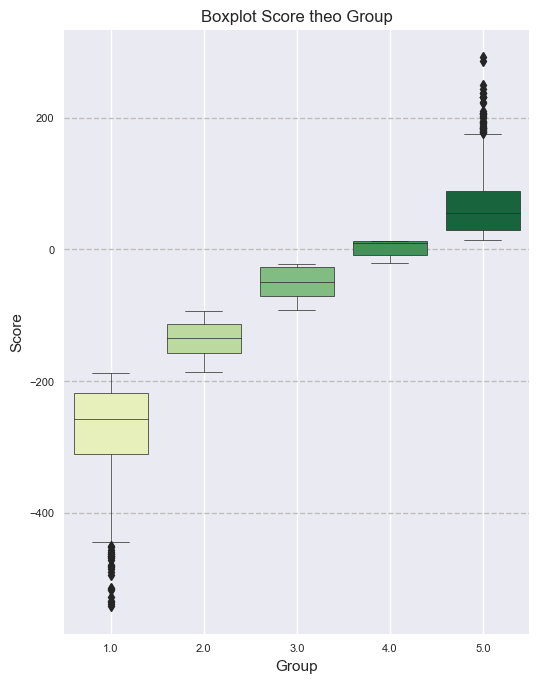

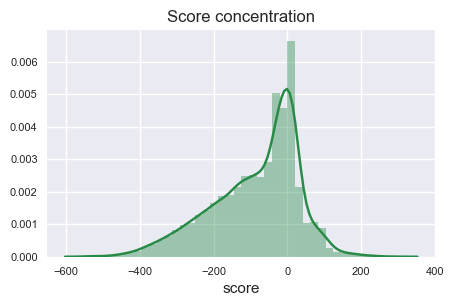

In [25]:
clf = LogisticRegression(n_jobs=-1)


clf.fit(X_train, y_train)
# score ------


card = sc.scorecard(bins, clf, X_train.columns,points0=150,pdo=-120)
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)


IV = {'VAR_NAME':[],'IV':[]}
for col in list(bins.keys()): 
    IV['VAR_NAME'].append(col)
    IV['IV'].append(bins[col]['total_iv'].iloc[0])
IV = pd.DataFrame(IV["IV"], index = IV['VAR_NAME'],columns=["IV"])
IV.sort_values("IV",inplace = True) 
IV = IV[IV.IV >= 0.02]
fig, ax = plt.subplots(figsize = (8,4),dpi = 100 )
ax.tick_params(axis='both', which='major', labelsize=7)
IV.plot.barh(ax = ax)


plt.style.use('seaborn')
import performance_model_v2 as per
#per.woebin_plot(bins,label_Pos='Paid')

# --- gini_ks
gini_ks = per.perf_gini_ks(clf,X_test.values,y_test.values)

# --- lift_gains
lift_gains = per.perf_lift_gains(clf,X_test.values,y_test.values)

# --- psi


df_probs , df_range ,cuts = per.probs_to_bins(test_score, y_test.values, 5,
                                              label_Pos = 'Bad'
                                              ,dpi = 100)

df_probs = per.scoring_boxplot(test_score,df_probs)




## TESTING

(20000, 63)


In [65]:
df = pd.read_csv('test.csv')
print(df.shape)

def VI_to_EN_province(string):
    try:
        string = unidecode.unidecode(string)
        string = string.replace(" ", "").replace("-", "").upper()
        if string == 'TINHDACNONG':
            string = 'TINHDAKNONG'
        elif string == 'THANHPHOHOCHIMINH':
            string = 'TPHOCHIMINH'
        return string
    except:
        return 'NULL'
    
df['province'] = [np.nan if x== None else VI_to_EN_province(x) for x in df['province']]

group4 = ['TINHBINHDUONG','TPHOCHIMINH','TINHLONGAN','TINHDONGNAI',
              'TINHBACNINH','THANHPHOHANOI']
group3 = ['TINHBARIAVUNGTAU','THANHPHOHAIPHONG','TINHTIENGIANG','TINHCAMAU',
          'TINHBINHPHUOC','TINHBACLIEU','TINHBACGIANG','TINHTUYENQUANG',
          'TINHCAOBANG']
group2 = ['TINHKIENGIANG','THANHPHOCANTHO','TINHLAOCAI','TINHTAYNINH',
          'TINHLANGSON','TINHTHAIBINH','TINHANGIANG','TINHSOCTRANG',
          'TINHBENTRE','TINHHANAM','THANHPHODANANG','TINHDONGTHAP',
          'TINHVINHLONG','TINHDAKNONG','TINHLAMDONG','TINHTHANHHOA',
          'TINHNGHEAN','TINHTHAINGUYEN','TINHHAUGIANG','TINHGIALAI']
group1 = ['TINHLAICHAU','TINHVINHPHUC','TINHBINHTHUAN','TINHQUANGNINH',
          'TINHHAGIANG','TINHYENBAI','TINHKHANHHOA','TINHPHUTHO',
          'TINHHOABINH','TINHPHUYEN','TINHHUNGYEN','TINHSONLA',
          'TINHNAMDINH','TINHTRAVINH','TINHHAIDUONG','TINHDIENBIEN',
          'TINHQUANGNGAI','TINHKONTUM','TINHDAKLAK','TINHHATINH',
          'TINHBINHDINH','TINHQUANGNAM','TINHNINHTHUAN','TINHBACKAN',
          'TINHQUANGBINH','TINHNINHBINH','TINHTHUATHIENHUE','TINHQUANGTRI']

df.loc[df.province.isin(group1 ), 'province'] = 'group1'
df.loc[df.province.isin(group2 ), 'province'] = 'group2'
df.loc[df.province.isin(group3 ), 'province'] = 'group3'
df.loc[df.province.isin(group4 ), 'province'] = 'group4'

#-- maCv
def VI_to_EN2(string):
    try:
        string = unidecode.unidecode(string)
        string = string.replace(" ", "").replace("-", "").lower()
    except:
        return  'none'
    
    value_list = ['congnhan','nhanvien','giaovien' ,'ketoan']
    
    if string == 'none':
        return string
    elif string in ('taixe','laixe'):
        return 'taixe'
    
    for s in value_list:
        if s in string:
            return  s
            
            
    return 'other'

df['maCv'] = [np.nan if x== None else VI_to_EN2(x) for x in df['maCv']]
#-- F7

x1 = ['TC','NO','CC','NN','TK','HX','TQ','XK','HD','HC','CH','SV','GB','XD']
x2 = ['DN', 'GD', 'DT', 'CK', 'TE']
x3 = ['CB', 'DK', 'HS', 'CN']
x4 = ['BT', '', 'TN', 'TA', 'HT', 'none', 'HN', 'TS', 'KC']

def field7(x):
    try:
        x = x.replace("[","").replace("]","").replace("'","")
        x = x.split(',')
        return stats.mode(x).mode[0].replace(" ","")
    except:
        return 'none'
    
df.FIELD_7 = [field7(x) for x in df.FIELD_7]

df.loc[df.FIELD_7.isin(x1 ), 'FIELD_7'] = 'group1'
df.loc[df.FIELD_7.isin(x2 ), 'FIELD_7'] = 'group2'
df.loc[df.FIELD_7.isin(x3 ), 'FIELD_7'] = 'group3'
df.loc[df.FIELD_7.isin(x4 ), 'FIELD_7'] = 'group4'

(20000, 63)


In [66]:
df_id = df['id']
df.drop(['id','district'], axis=1, inplace=True)
dt_s = df.copy()
dt_s.drop(['FIELD_13','FIELD_18','FIELD_19','FIELD_23',
           'FIELD_20','FIELD_25','FIELD_26','FIELD_27',
           'FIELD_28','FIELD_37','FIELD_38','FIELD_45'], axis = 1 ,inplace = True) 


test = sc.woebin_ply(dt_s, bins)

[INFO] converting into woe values ...


In [67]:
missing = test.isnull().sum()[test.isnull().sum() > 0]
print('missing : ', missing)
for col in missing.index :
    test[col].fillna(test[col].mode()[0],inplace = True)

missing :  FIELD_11_woe      13
FIELD_41_woe       1
FIELD_7_woe        1
FIELD_36_woe    2466
FIELD_9_woe        6
FIELD_12_woe       6
FIELD_10_woe       1
FIELD_39_woe      10
dtype: int64


In [68]:
y_pred = clf.predict_proba(test)[:,1:]

In [71]:
probs = clf.predict_proba(test)
probs = probs[:, 1]
probs

array([0.0238088 , 0.01953627, 0.00462709, ..., 0.01953627, 0.02533665,
       0.01827379])

In [72]:
len(probs)

20000

In [73]:
df_predict = pd.DataFrame({'id': df_id, 'label':probs})

In [77]:
df_predict.to_csv('submission_logistic.csv', index=None)

In [76]:
df_predict

,id,label
0,30000,0.023809
1,30001,0.019536
2,30002,0.004627
3,30003,0.007508
4,30004,0.023809
...,...,...
19995,49995,0.015337
19996,49996,0.025408
19997,49997,0.019536
19998,49998,0.025337
